In [1]:
#Importing Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Loading Dataset
dataset = pd.read_csv('~/Clustering/seeds_dataset.csv')

In [3]:
# Showing the columns
dataset.columns

Index(['Area', 'Perimeter', 'Compactness', 'LengthofKernel', 'WidthofKernel',
       'AsymmetryCoefficient', 'lengthofkernel groove', 'Class'],
      dtype='object')

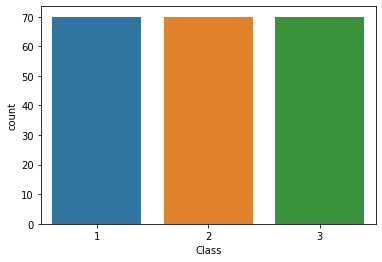

In [4]:
# Showing the class
distribution = sns.countplot('Class', data=dataset)
fig = distribution.get_figure()
fig.savefig('~/Clustering/distribution.png')

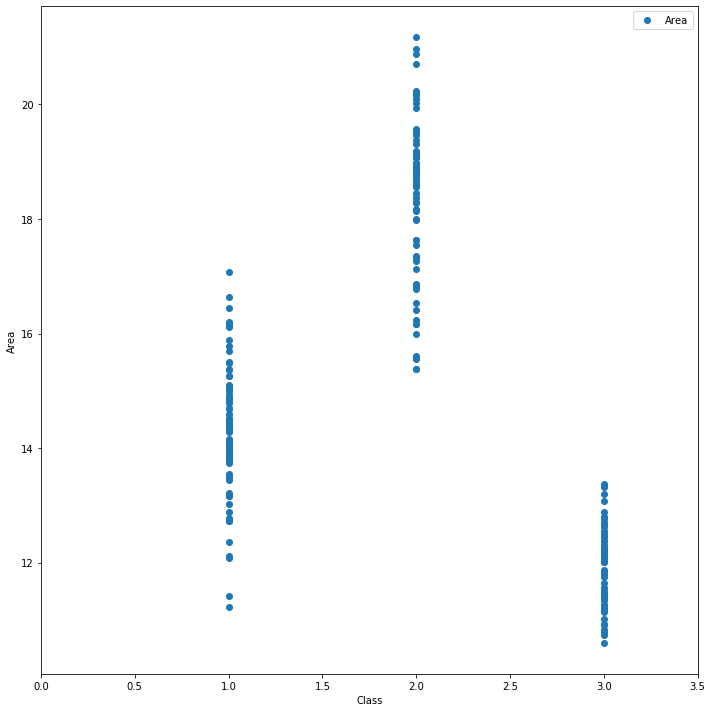

In [6]:
# Showing the Area x Class
dataset.plot(x='Class', y='Area', style='o', figsize=(10,10), xlim=(0,3.5))
plt.xlabel('Class')
plt.ylabel('Area')
plt.tight_layout()
plt.show()

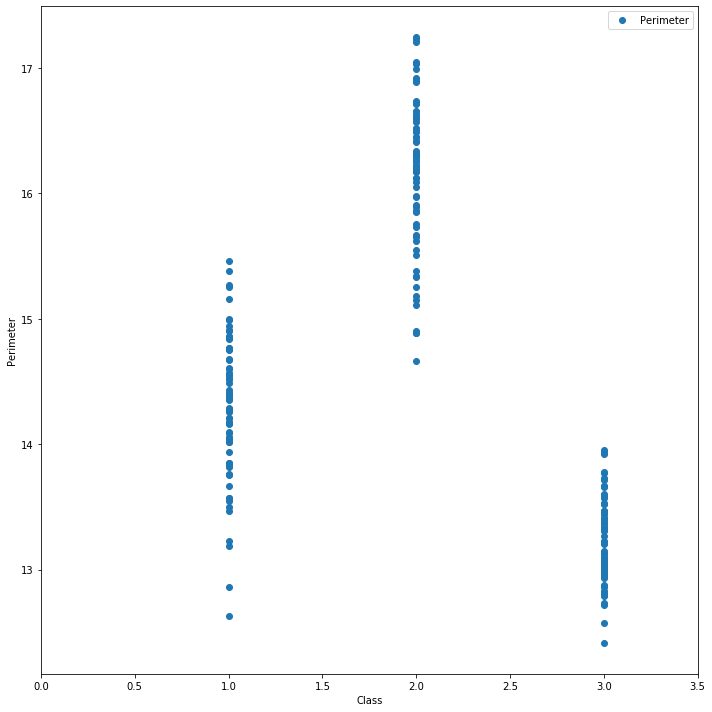

In [7]:
# Showing the Perimeter x Class
dataset.plot(x='Class', y='Perimeter', style='o', figsize=(10,10), xlim=(0,3.5))
plt.xlabel('Class')
plt.ylabel('Perimeter')
plt.tight_layout()
plt.show()

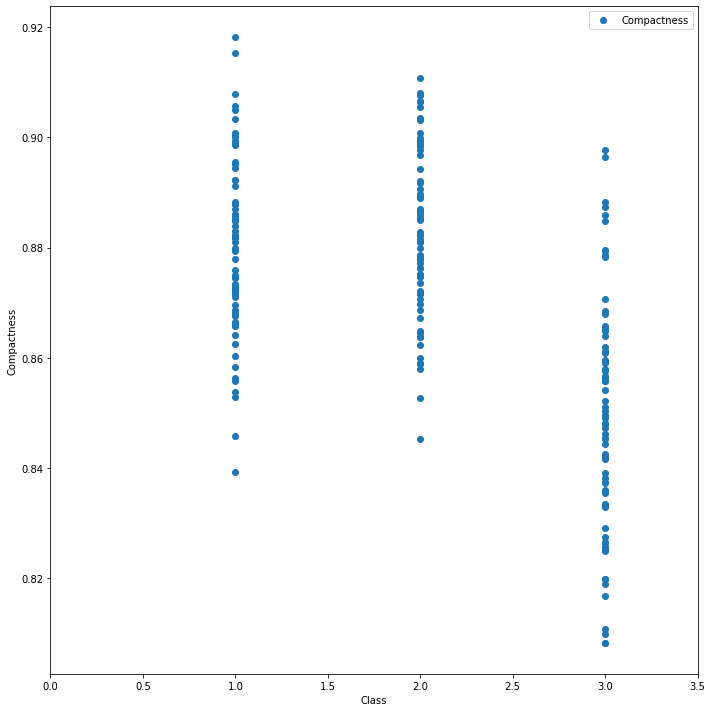

In [8]:
# Showing the Compactness x Class
dataset.plot(x='Class', y='Compactness', style='o', figsize=(10,10), xlim=(0,3.5))
plt.xlabel('Class')
plt.ylabel('Compactness')
plt.tight_layout()
plt.show()

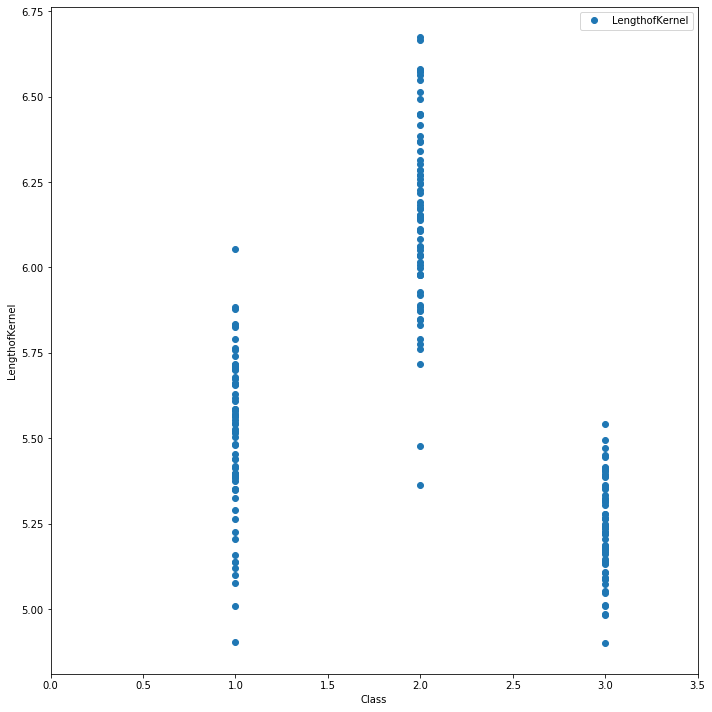

In [9]:
# Showing the LengthofKernel x Class
dataset.plot(x='Class', y='LengthofKernel', style='o', figsize=(10,10), xlim=(0,3.5))
plt.xlabel('Class')
plt.ylabel('LengthofKernel')
plt.tight_layout()
plt.show()

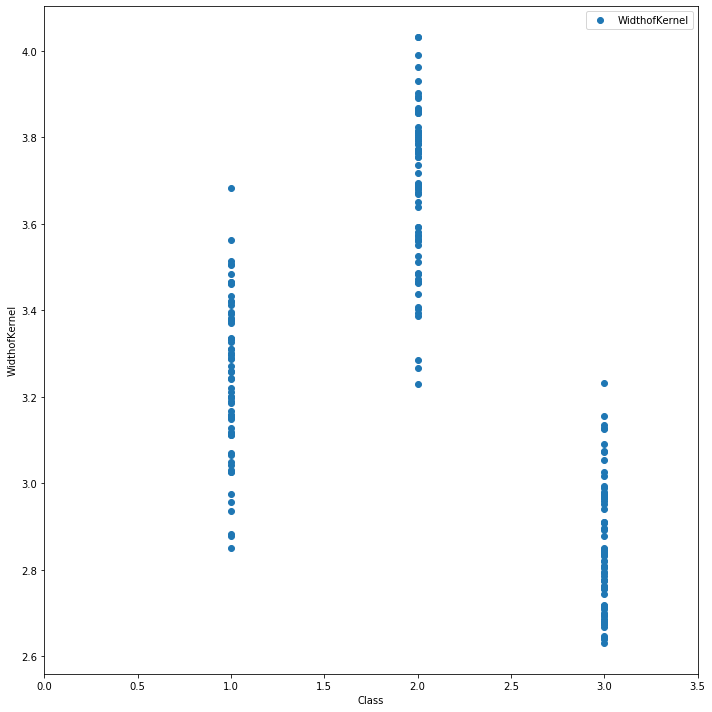

In [10]:
# Showing the WidthofKernel x Class
dataset.plot(x='Class', y='WidthofKernel', style='o', figsize=(10,10), xlim=(0,3.5))
plt.xlabel('Class')
plt.ylabel('WidthofKernel')
plt.tight_layout()
plt.show()

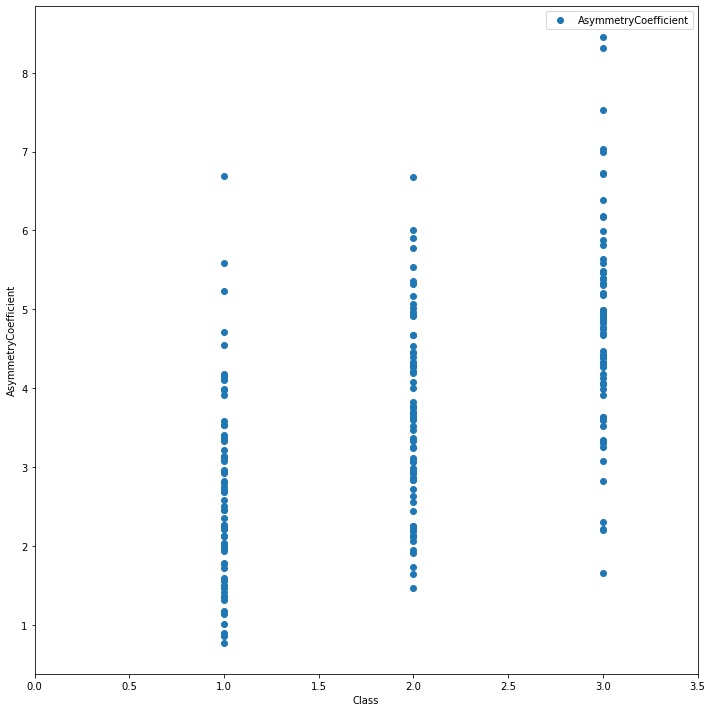

In [11]:
# Showing the AsymmetryCoefficient x Class
dataset.plot(x='Class', y='AsymmetryCoefficient', style='o', figsize=(10,10), xlim=(0,3.5))
plt.xlabel('Class')
plt.ylabel('AsymmetryCoefficient')
plt.tight_layout()
plt.show()

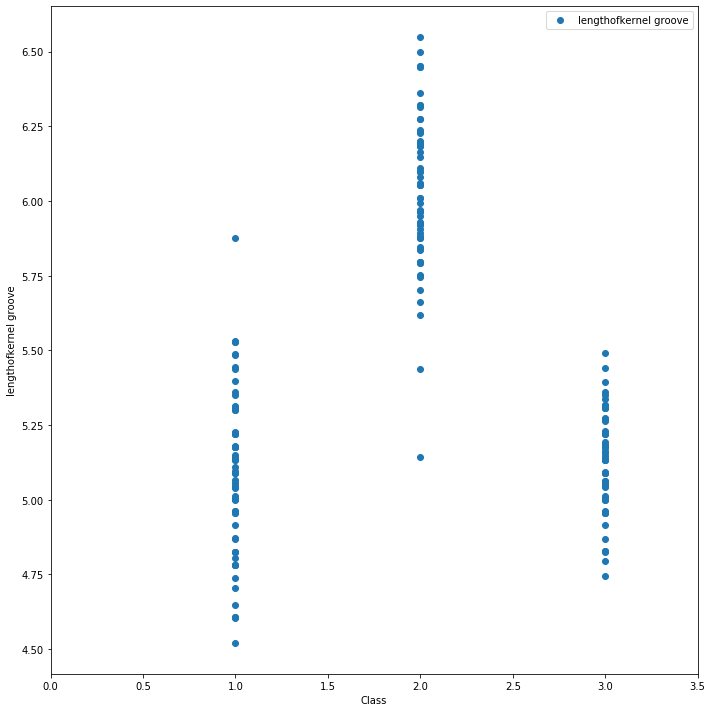

In [12]:
# Showing the LengthofKernel x Class
dataset.plot(x='Class', y='lengthofkernel groove', style='o', figsize=(10,10), xlim=(0,3.5))
plt.xlabel('Class')
plt.ylabel('lengthofkernel groove')
plt.tight_layout()
plt.show()

In [13]:
# Excluing the Class column
dataset = dataset.drop(columns=['Class'])

In [14]:
dataset.head(5)

,Area,Perimeter,Compactness,LengthofKernel,WidthofKernel,AsymmetryCoefficient,lengthofkernel groove
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175


In [48]:
from sklearn.preprocessing import MinMaxScaler

In [49]:
# Doing a normalization
MinMax = MinMaxScaler()
dataset = MinMax.fit_transform(dataset)

In [50]:
print(dataset)

[[0.44098206 0.50206612 0.5707804  ... 0.48610121 0.18930164 0.34515017]
 [0.40509915 0.44628099 0.66243194 ... 0.50106914 0.03288302 0.21516494]
 [0.34938621 0.34710744 0.87931034 ... 0.50392017 0.25145302 0.1506647 ]
 ...
 [0.24645892 0.25826446 0.7277677  ... 0.42908054 0.98166664 0.26440177]
 [0.11803588 0.16528926 0.39927405 ... 0.14682823 0.36834441 0.25849335]
 [0.16147309 0.19214876 0.54718693 ... 0.24518888 0.63346292 0.26784835]]


In [51]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm

For n_clusters = 2 The average silhouette_score is : 0.5051138855889511
For n_clusters = 3 The average silhouette_score is : 0.4221052568124793
For n_clusters = 4 The average silhouette_score is : 0.34554402248711713
For n_clusters = 5 The average silhouette_score is : 0.2977305588180166
For n_clusters = 6 The average silhouette_score is : 0.30544353626266063
For n_clusters = 7 The average silhouette_score is : 0.27281250066506224


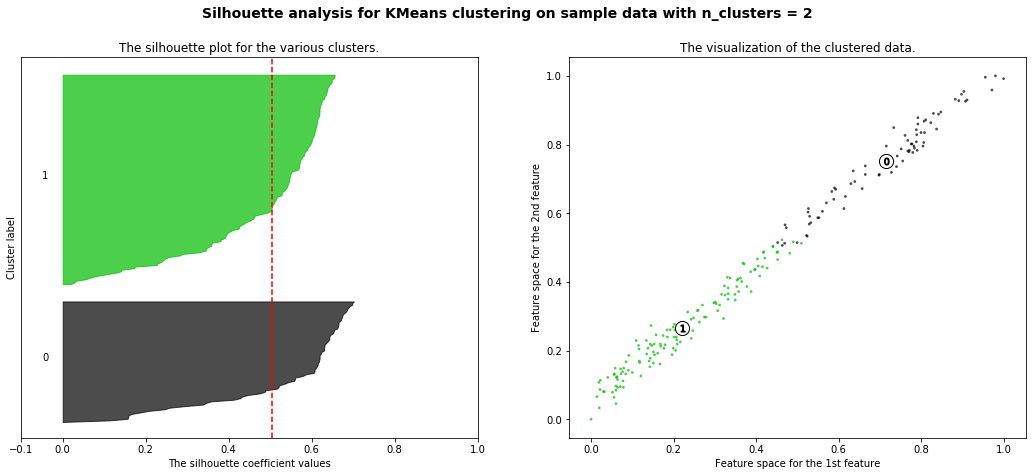

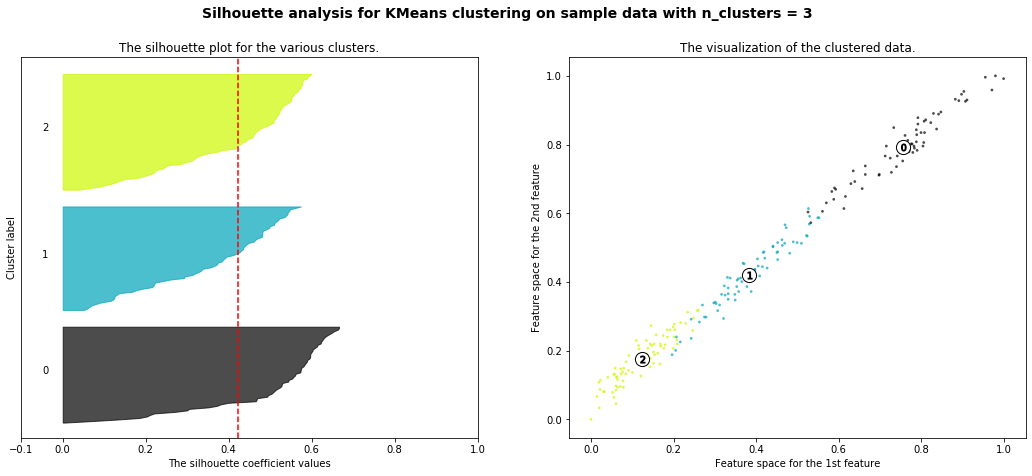

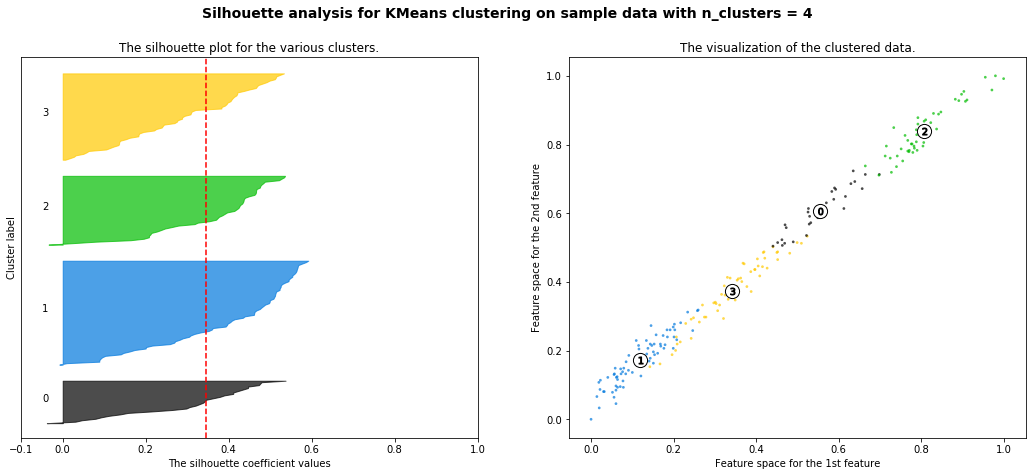

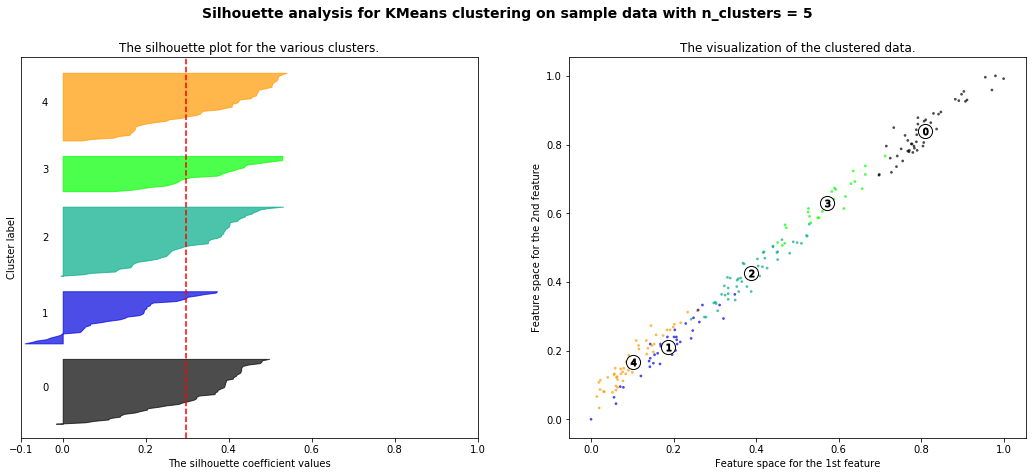

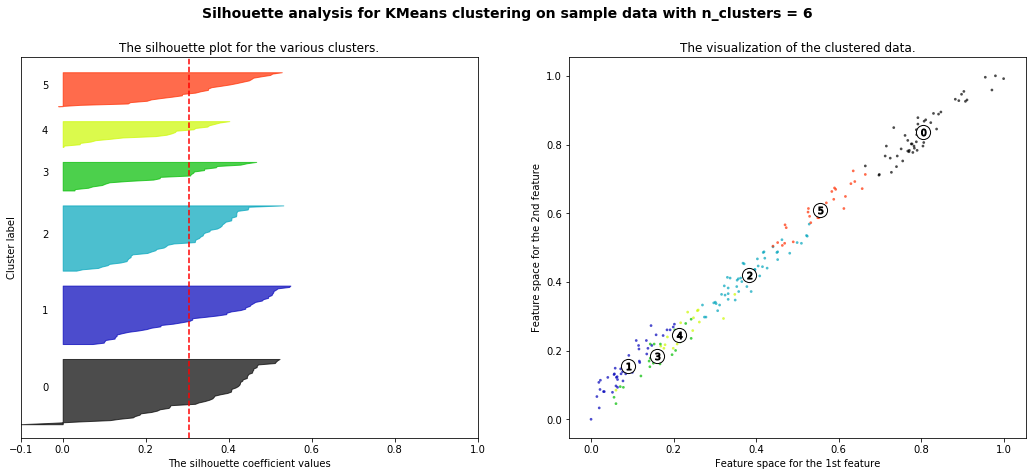

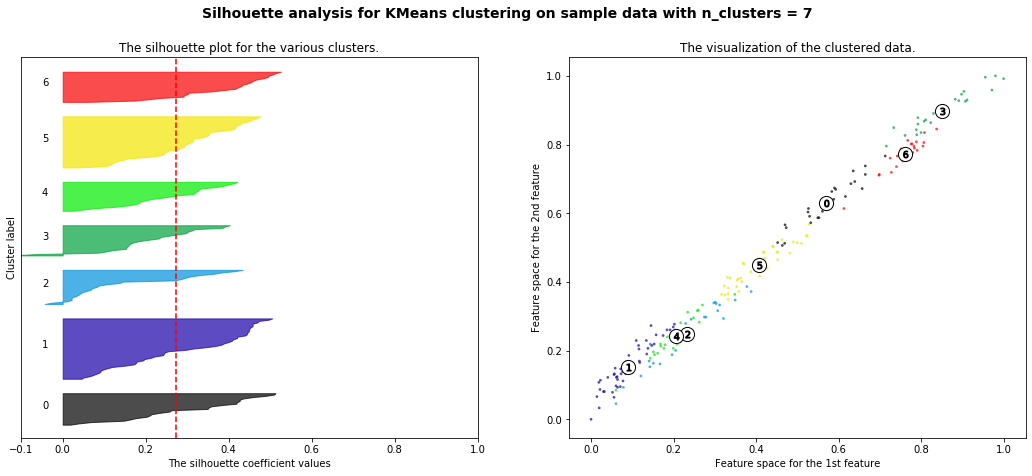

In [52]:
range_n_clusters = [2, 3, 4, 5, 6, 7]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(dataset) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(dataset)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(dataset, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(dataset, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(dataset[:, 0], dataset[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()

In [53]:
from sklearn.cluster import AffinityPropagation
from sklearn import metrics

Estimated number of clusters: 3
Silhouette Coefficient: 0.620


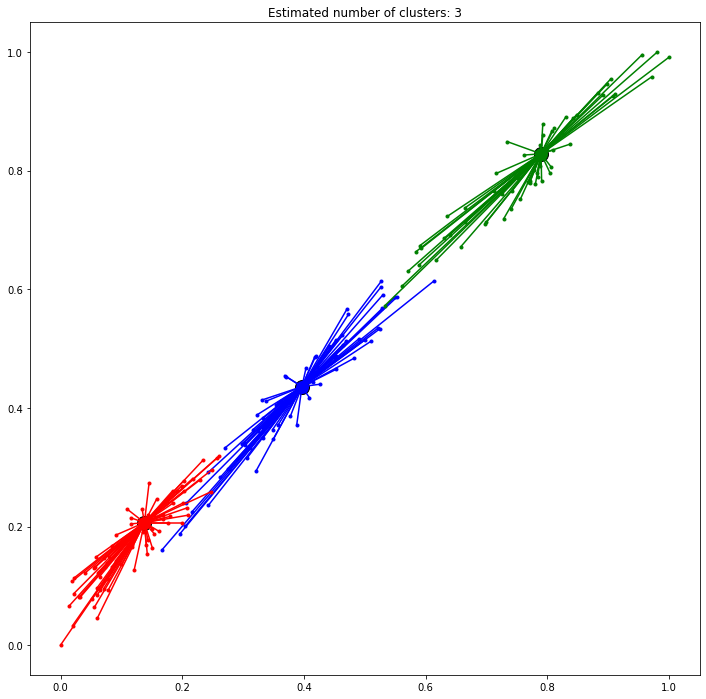

In [54]:
# Compute Affinity Propagation
af = AffinityPropagation(preference=-9).fit(dataset)
cluster_centers_indices = af.cluster_centers_indices_
labels = af.labels_

n_clusters_ = len(cluster_centers_indices)

print('Estimated number of clusters: %d' % n_clusters_)
print("Silhouette Coefficient: %0.3f"
      % metrics.silhouette_score(dataset, labels, metric='sqeuclidean'))

# #############################################################################
# Plot result
import matplotlib.pyplot as plt
from itertools import cycle

plt.close('all')
plt.figure(figsize=(12,12))
plt.clf()

colors = cycle('bgrcmykbgrcmykbgrcmykbgrcmyk')
for k, col in zip(range(n_clusters_), colors):
    class_members = labels == k
    cluster_center = dataset[cluster_centers_indices[k]]
    plt.plot(dataset[class_members, 0], dataset[class_members, 1], col + '.')
    plt.plot(cluster_center[0], cluster_center[1], 'o', markerfacecolor=col,
             markeredgecolor='k', markersize=14)
    for x in dataset[class_members]:
        plt.plot([cluster_center[0], x[0]], [cluster_center[1], x[1]], col)

plt.title('Estimated number of clusters: %d' % n_clusters_)
plt.show()

In [56]:
from sklearn.cluster import AgglomerativeClustering

For n_clusters = 2 The average silhouette_score is : 0.49347658912108566
For n_clusters = 3 The average silhouette_score is : 0.38103690313150723
For n_clusters = 4 The average silhouette_score is : 0.3320298426074032
For n_clusters = 5 The average silhouette_score is : 0.2744227682280253
For n_clusters = 6 The average silhouette_score is : 0.27282542349309835
For n_clusters = 7 The average silhouette_score is : 0.27105113640220146


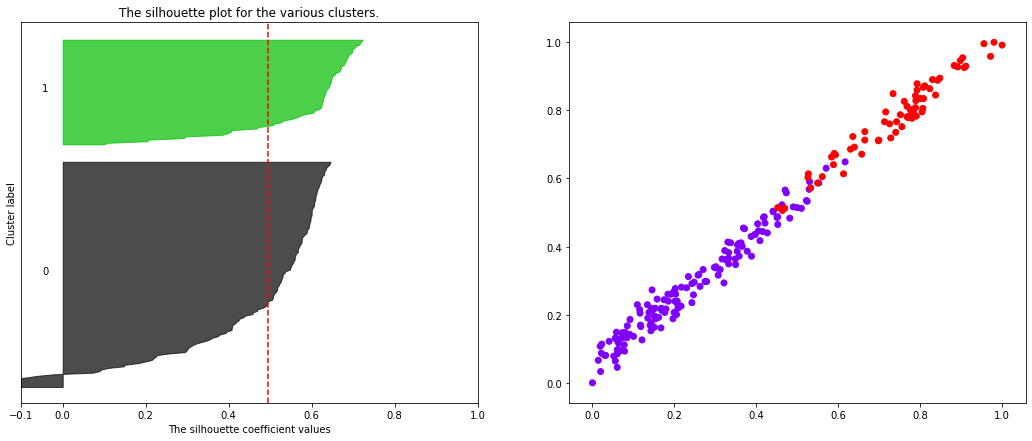

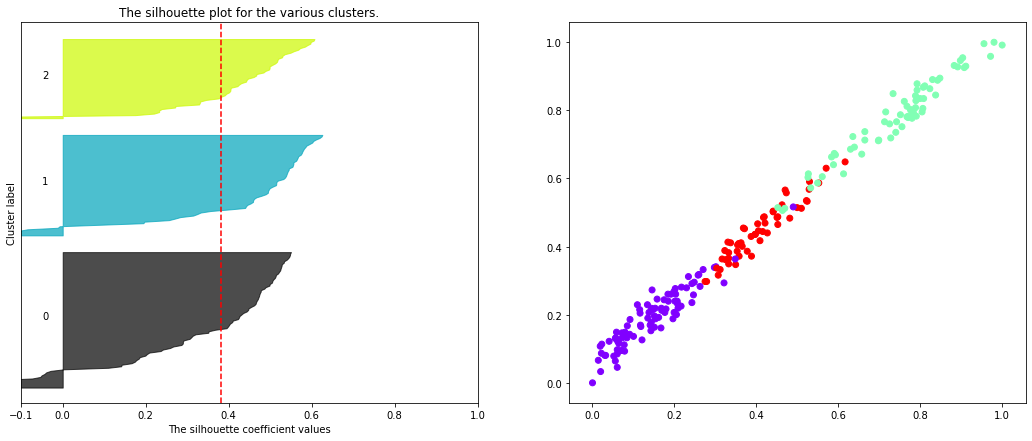

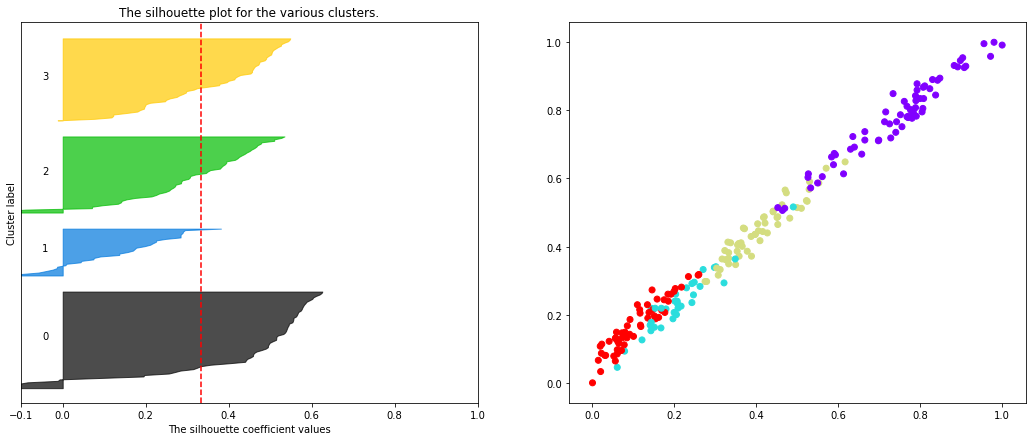

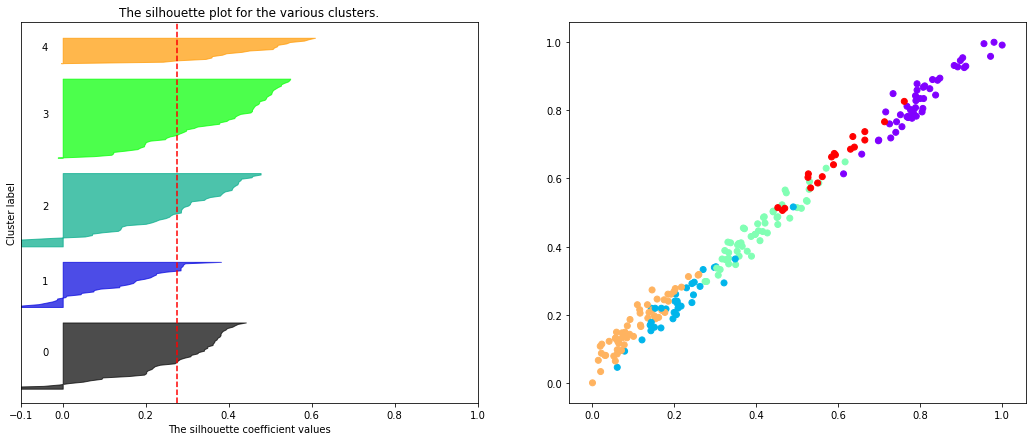

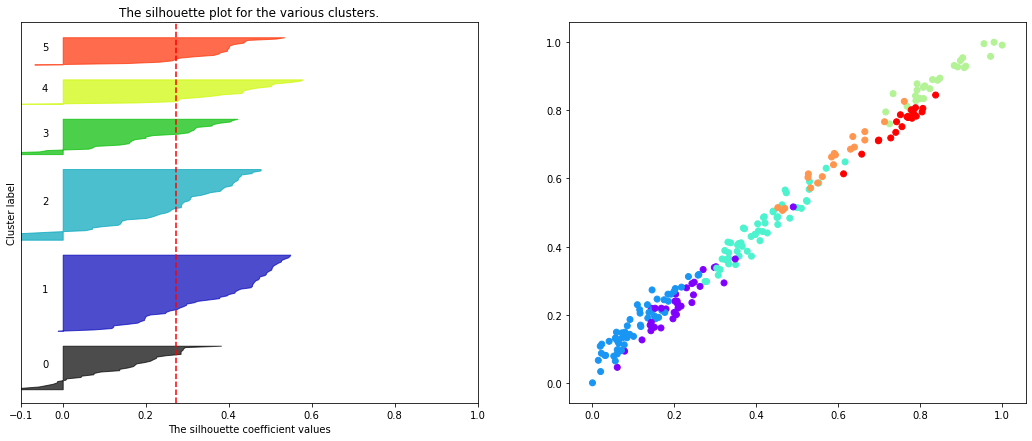

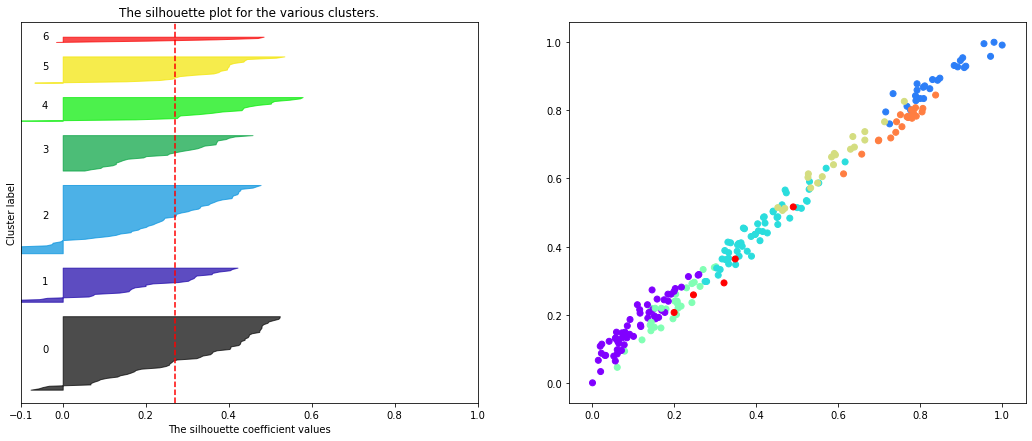

In [61]:
range_n_clusters = [2, 3, 4, 5, 6, 7]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(dataset) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = AgglomerativeClustering(n_clusters=n_clusters, affinity='euclidean' , linkage='ward')
    cluster_labels = clusterer.fit_predict(dataset)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(dataset, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(dataset, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    ax2.scatter(dataset[:, 0], dataset[:, 1], c=cluster_labels, cmap='rainbow')

    

plt.show()

In [63]:
from sklearn.cluster import SpectralClustering

For n_clusters = 2 The average silhouette_score is : 0.5001859995389046
For n_clusters = 3 The average silhouette_score is : 0.4145238579914468
For n_clusters = 4 The average silhouette_score is : 0.32283845394897526
For n_clusters = 5 The average silhouette_score is : 0.2683052329936468
For n_clusters = 6 The average silhouette_score is : 0.22265499662146487
For n_clusters = 7 The average silhouette_score is : 0.19529064092184908


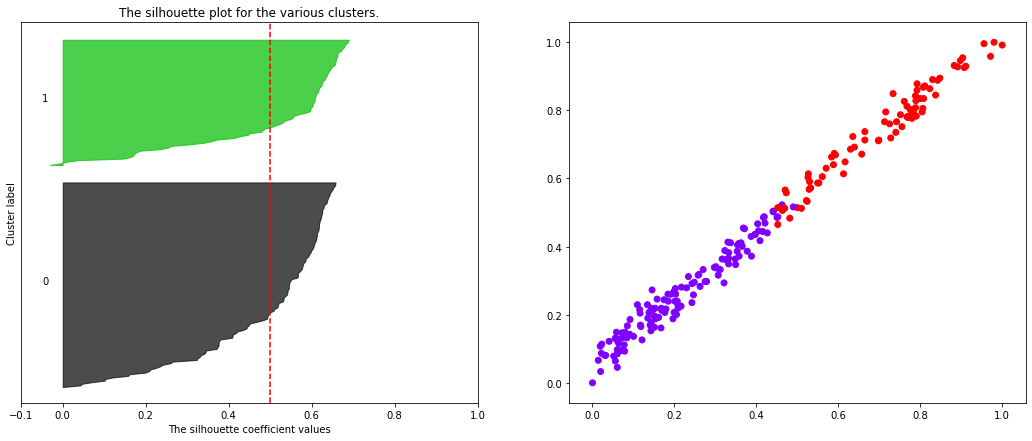

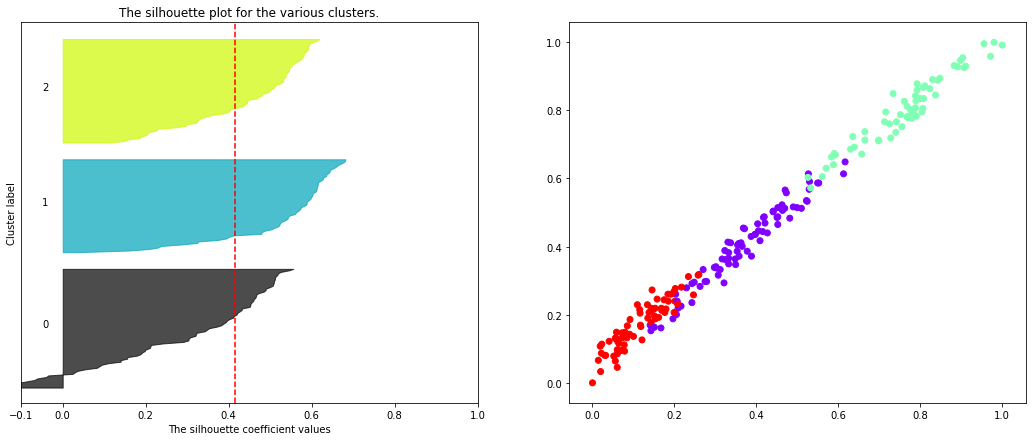

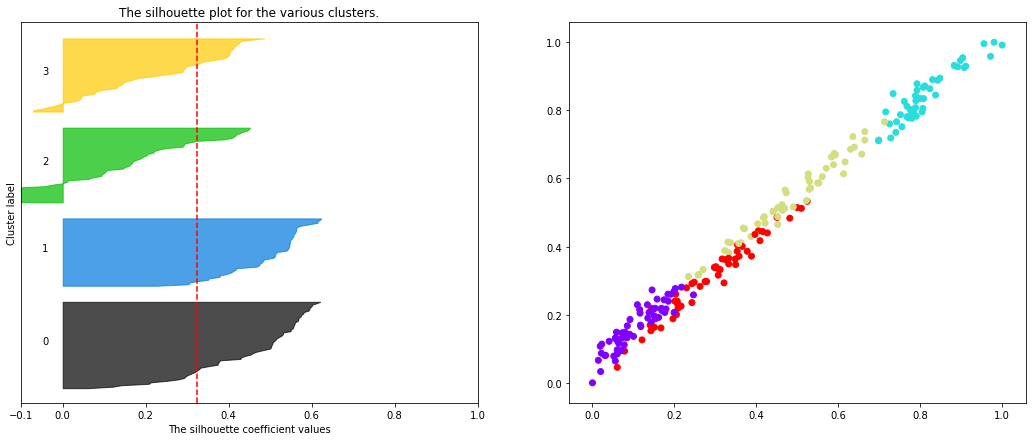

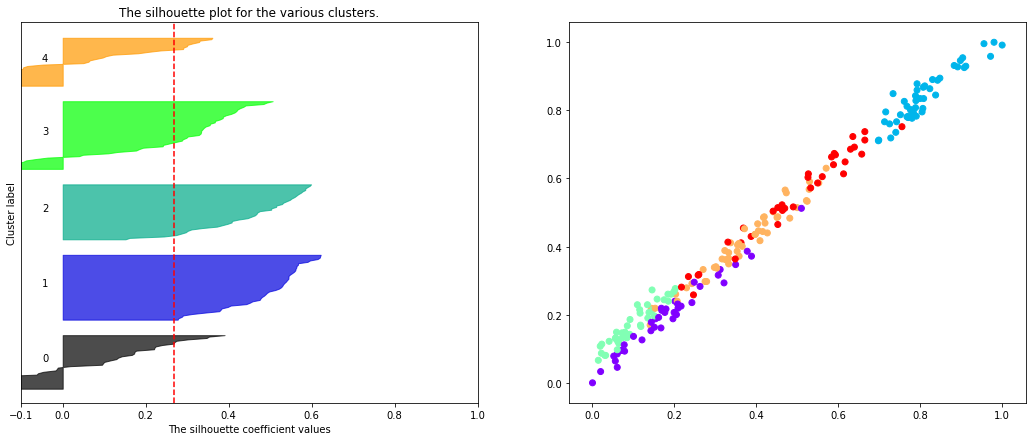

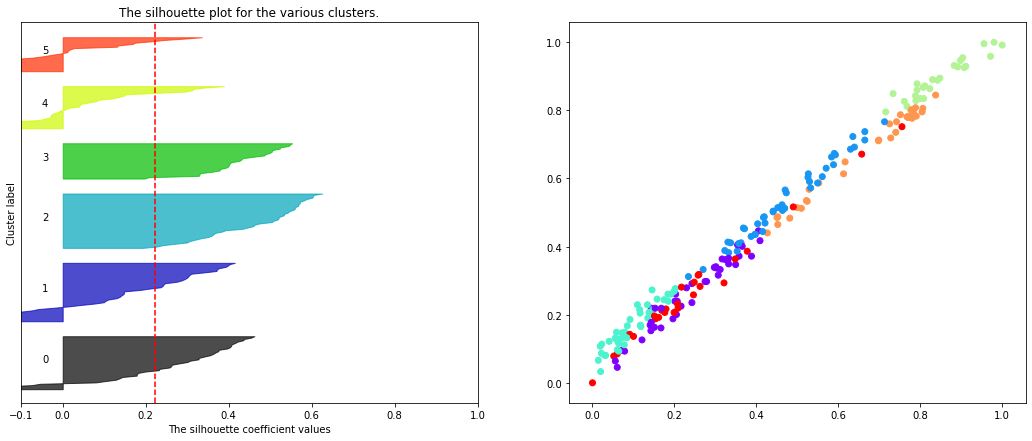

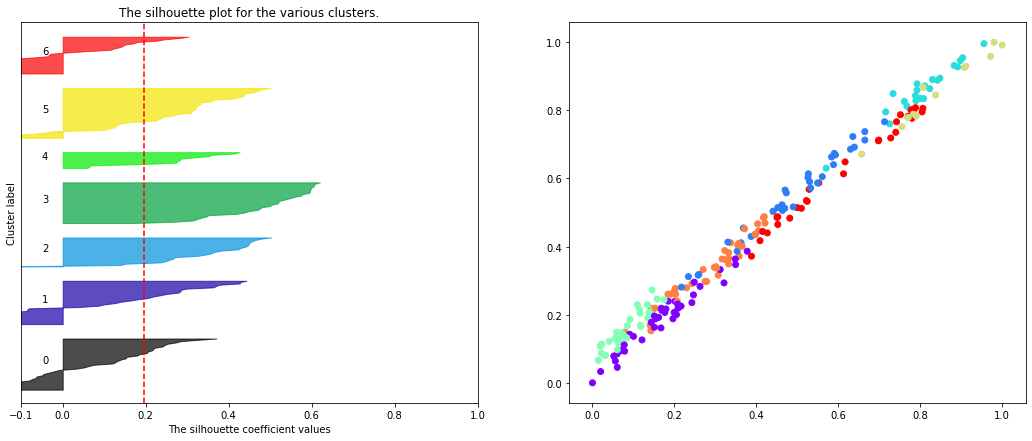

In [64]:
range_n_clusters = [2, 3, 4, 5, 6, 7]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(dataset) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = SpectralClustering(n_clusters=n_clusters, assign_labels="discretize" , random_state=10)
    cluster_labels = clusterer.fit_predict(dataset)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(dataset, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(dataset, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    ax2.scatter(dataset[:, 0], dataset[:, 1], c=cluster_labels, cmap='rainbow')

    

plt.show()